In [3]:

import pandas as pd
import numpy as np
import os

# Path to your CEAS_08 data
ceas_file_path = "../data/raw/CEAS_08.csv"

# Read in the CEAS_08 dataset
df = pd.read_csv(ceas_file_path)

# Shuffle the dataset and select the last 2000 rows for unseen test data
df_unseen = df.tail(2000)

# Ensure the directory exists before saving the unseen data
unseen_dir = "../data/unseen"
os.makedirs(unseen_dir, exist_ok=True)

# Save the extracted unseen data as a new file
unseen_save_path = os.path.join(unseen_dir, "client_ceas_unseen.csv")
df_unseen.to_csv(unseen_save_path, index=False)

print(f"✅ Extracted unseen test data saved to {unseen_save_path}")



✅ Extracted unseen test data saved to ../data/unseen/client_ceas_unseen.csv


Number of duplicate rows: 0

Data distribution (Phishing vs Legitimate):
label
1    1167
0     833
Name: count, dtype: int64

Summary statistics of numerical features:
             label         urls
count  2000.000000  2000.000000
mean      0.583500     0.483000
std       0.493102     0.499836
min       0.000000     0.000000
25%       0.000000     0.000000
50%       1.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000


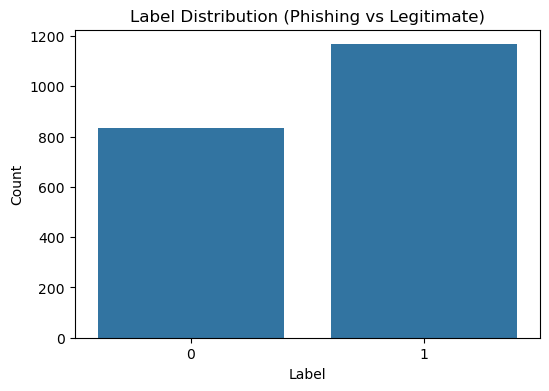

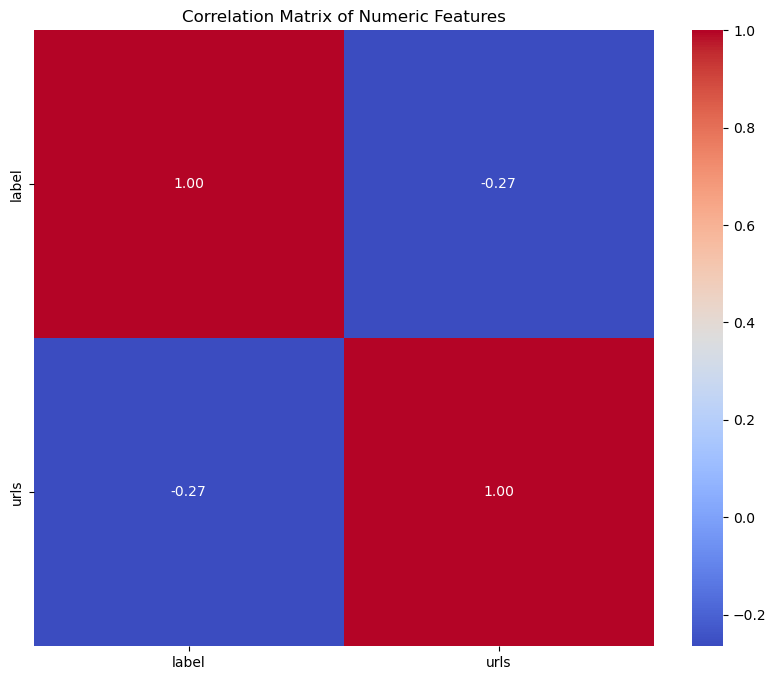

In [5]:
import pandas as pd

# Load the saved unseen test data
unseen_file_path = "../data/unseen/client_ceas_unseen.csv"
df_unseen = pd.read_csv(unseen_file_path)

# 1. Check for Duplicates
duplicates = df_unseen.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# 2. Check for Data Distribution (Phishing vs Legitimate)
label_counts = df_unseen['label'].value_counts()
print("\nData distribution (Phishing vs Legitimate):")
print(label_counts)

# 3. Summary Statistics
print("\nSummary statistics of numerical features:")
print(df_unseen.describe())

# Visualize data distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_unseen, x='label')
plt.title('Label Distribution (Phishing vs Legitimate)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Exclude non-numeric columns for correlation matrix
numeric_df = df_unseen.select_dtypes(include=[float, int])

# Check the correlation matrix for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Load the unseen dataset
df_unseen = pd.read_csv("../data/unseen/client_ceas_unseen.csv")

# Preview the data
df_unseen.head()


,sender,receiver,date,subject,body,label,urls
0,Taylor Christensen <AldisruptSaunders@yourdict...,quintin.mcgrail@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 13:02:13 -0100","Make the Impossible, Possible. Enlarge your Pe...",\nRead hundreds of genuine testimonials from s...,1,1
1,bryan jacques <quickq@eschultz.com>,user8.2-ext2@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 09:19:00 +0000",How to get out of bad health. X,\n Find your love stick gain he...,1,0
2,Taylor Mcbride <IgnaciocauliflowerAlvarado@lat...,"testimonialswing04@gvc.ceas-challenge.cc, user...","Fri, 08 Aug 2008 08:48:02 +0300","Find the best replica rolex, Jewelry etc.",\nTherefore it is very important to chose the ...,1,1
3,Tamas Sarga <tfpig.eodtb4@gmail.com>,suse <wkilxloc@opensuse.org>,"Fri, 08 Aug 2008 12:03:22 +0100",Re: [opensuse] Difference between Main Reposit...,-----BEGIN PGP SIGNED MESSAGE-----\nHash: SHA1...,0,1
4,Ervin Nunez <MartyresistantChristensen@jsonlin...,"arlean_m_alty@gvc.ceas-challenge.cc, inezhosek...","Fri, 08 Aug 2008 08:48:08 +0300",0ver 3OO $tyles of Replica //atches,\n- Solid 14k or 18k Gold on two-toned models ...,1,1


In [7]:
# Check current label distribution
print("\nBefore balancing, the label distribution is:")
print(df_unseen['label'].value_counts())

# Separate the dataset into phishing and legit
df_phishing = df_unseen[df_unseen['label'] == 1]
df_legit = df_unseen[df_unseen['label'] == 0]

# Downsample phishing to match the number of legit samples
df_phishing_downsampled = df_phishing.sample(n=len(df_legit), random_state=42)

# Combine the downsampled phishing data with legit data
df_balanced = pd.concat([df_legit, df_phishing_downsampled])

# Shuffle the data for randomness
df_balanced = shuffle(df_balanced, random_state=42)

# Check the balanced label distribution
print("\nAfter balancing, the label distribution is:")
print(df_balanced['label'].value_counts())

# Preview the balanced dataset
df_balanced.head()



Before balancing, the label distribution is:
label
1    1167
0     833
Name: count, dtype: int64

After balancing, the label distribution is:
label
1    833
0    833
Name: count, dtype: int64


,sender,receiver,date,subject,body,label,urls
1716,CNN Alerts <frakte_1973@emmeffe.net>,email151@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:06:51 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
1688,CNN Alerts <steffi-egnalnek@sorrentolactalis.com>,email775@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:04:01 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
981,SpamExperts via Twitter <uiaregi@twitter.com>,user2.1@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 12:28:09 +0000",Direct message from SpamExperts via web,zz Memory lack of (10min) mt_se_xen3: ON\n7.86...,0,1
1759,"""Astrology.com Daily Horoscope"" <dailyhoroscop...",gvcormac@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 06:35:35 -0700",Astrology.com: Daily Horoscope,\n\nAstrology.com Daily Horoscope\n\n\n\n\nHor...,0,1
475,CNN Alerts <lessomed@4wcz.tk>,user4@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 07:36:51 -0400",CNN Alerts: My Custom Alert,\n\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\...,1,0


In [8]:
# Save the balanced dataset to a new file
balanced_save_path = "../data/unseen/client_ceas_unseen_balanced.csv"
df_balanced.to_csv(balanced_save_path, index=False)

print(f"✅ Balanced dataset saved to {balanced_save_path}")


✅ Balanced dataset saved to ../data/unseen/client_ceas_unseen_balanced.csv
